In [1]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
audit = pd.read_csv('audit_risk.csv')


In [3]:
audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
 trial = pd.read_csv('trial.csv')

In [5]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [6]:
print("Shape of audit dataset",audit.shape)
print("shape of trial dataset",trial.shape)

Shape of audit dataset (776, 27)
shape of trial dataset (776, 18)


In [7]:
audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [8]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [9]:
# number of unique values
audit.nunique()

Sector_score       13
LOCATION_ID        45
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
TOTAL             471
numbers             5
Score_B.1           3
Risk_C              5
Money_Value       328
Score_MV            3
Risk_D            328
District_Loss       3
PROB                3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
dtype: int64

In [10]:
# number of unique values
trial.nunique()

Sector_score      13
LOCATION_ID       45
PARA_A           363
SCORE_A            3
PARA_B           358
SCORE_B            3
TOTAL            471
numbers            5
Marks              3
Money_Value      328
MONEY_Marks        3
District           3
Loss               3
LOSS_SCORE         3
History            7
History_score      3
Score             17
Risk               2
dtype: int64

# Check Missing value 

In [11]:
#checking for missing values
audit.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [12]:
#checking for missing values
trial.isnull().sum() 

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [14]:
# get money_value data
Money_Value = audit['Money_Value']


In [15]:
median = audit["Money_Value"].median()
audit["Money_Value"].fillna(median, inplace=True)

In [16]:
audit.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [17]:
#checking for missing values
audit.isnull().sum() 

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [18]:
median = trial["Money_Value"].median()
trial["Money_Value"].fillna(median, inplace=True)

In [19]:
#checking for missing values
trial.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [20]:
audit_columns = set(audit.columns)
trial_columns = set(trial.columns)

In [21]:
audit_columns.intersection(trial.columns)

{'History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Risk',
 'Score',
 'Sector_score',
 'TOTAL',
 'numbers'}

In [72]:
# Merging 
audit = audit.merge(trial, how = 'inner', on = ['History', 'LOCATION_ID', 'Money_Value','PARA_A','PARA_B','Sector_score','TOTAL','numbers'], sort = False)

KeyError: 'LOCATION_ID'

In [23]:
audit["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [28]:
audit['LOCATION_ID'] = audit['LOCATION_ID'].astype(float)

In [29]:
audit["LOCATION_ID"].unique()

array([23.,  6.,  7.,  8., 13., 37., 24.,  3.,  4., 14.,  5., 20., 19.,
       21., 22.,  9., 11., 12., 29., 30., 38., 31.,  2., 32., 16., 33.,
       15., 36., 34., 18., 25., 39., 27., 35., 40., 41., 42.,  1., 28.,
       43., 44., 17.])

(array([495.,  41., 237.]),
 array([ 1.85      , 21.18333333, 40.51666667, 59.85      ]),
 <BarContainer object of 3 artists>)

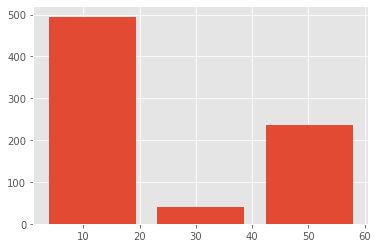

In [30]:
Sector_score =audit['Sector_score']
plt.hist(Sector_score , bins=3 , rwidth=0.8)


(array([136., 166., 108., 124., 105.,   8.,  53.,  33.,  27.,  13.]),
 array([ 1. ,  5.3,  9.6, 13.9, 18.2, 22.5, 26.8, 31.1, 35.4, 39.7, 44. ]),
 <BarContainer object of 10 artists>)

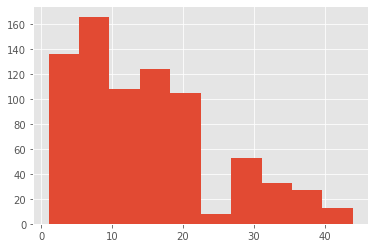

In [31]:
LOCATION_ID = audit['LOCATION_ID']
plt.hist(LOCATION_ID)

(array([763.,   6.,   1.,   1.,   2.]),
 array([ 0., 17., 34., 51., 68., 85.]),
 <BarContainer object of 5 artists>)

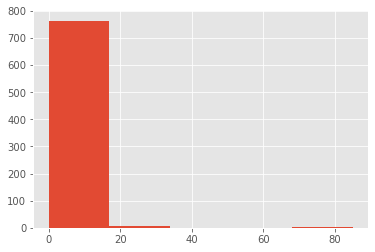

In [32]:
PARA_A = audit["PARA_A"]
plt.hist(PARA_A ,bins=5 , rwidth=2)

<BarContainer object of 773 artists>

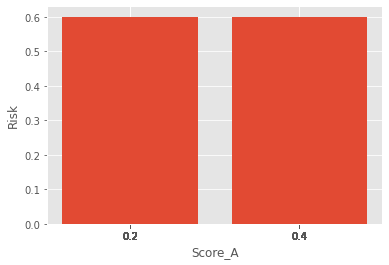

In [33]:
Score_A = audit["Score_A"]
Risk = audit["Risk"]
plt.xticks(Risk ,Score_A)
plt.ylabel("Risk")
plt.xlabel("Score_A")
plt.bar(Risk,Score_A )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '1.85'),
  Text(1, 0, '1.99'),
  Text(2, 0, '2.34'),
  Text(3, 0, '2.36'),
  Text(4, 0, '2.37'),
  Text(5, 0, '2.72'),
  Text(6, 0, '3.41'),
  Text(7, 0, '3.89'),
  Text(8, 0, '15.56'),
  Text(9, 0, '17.68'),
  Text(10, 0, '21.61'),
  Text(11, 0, '55.57'),
  Text(12, 0, '59.85')])

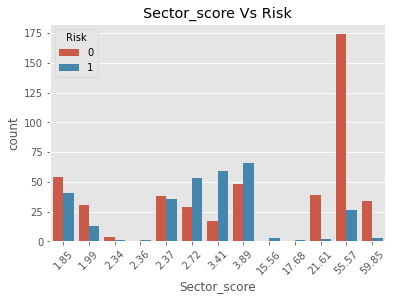

In [34]:
sns.countplot(x='Sector_score',data=audit[['Sector_score','Risk']],hue="Risk").set_title("Sector_score Vs Risk")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '9')])

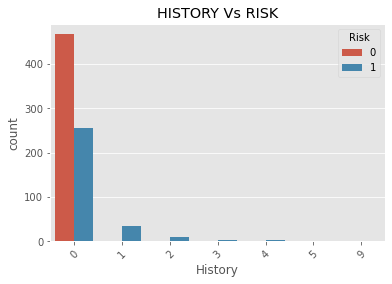

In [35]:
sns.countplot(x='History',data=audit[['History','Risk']],hue="Risk").set_title("HISTORY Vs RISK")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '11.0'),
  Text(10, 0, '12.0'),
  Text(11, 0, '13.0'),
  Text(12, 0, '14.0'),
  Text(13, 0, '15.0'),
  Text(14, 0, '16.0'),
  Text(15, 0, '17.0'),
  Text(16, 0, '18.0'),
  Text(17, 0, '19.0'),
  Text(18, 0, '20.0'),
  Text(19, 0, '21.0'),
  Text(20, 0, '22.0'),
  Text(21, 0, '23.0'),
  Text(22, 0, '24.0'),
  Text(23, 0, '25.0'),
  Text(24, 0, '27.0'),
  Text(25, 0, '28.0'),
  Text(26, 0, '29.0'),
  Text(27, 0, '30.0'),
  Text(28, 0, '31.0'),
  Text(29, 0, '32.0'),
  Text(30, 0, '33.0'),
  Text(31, 0, '34.0'),
  Text(32, 0, '35.0'),
  Text(33, 0, '36.0'),
  Text(34, 0, '37.0'),
  Text(35, 0, '38.0'

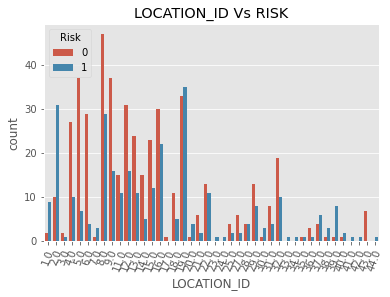

In [38]:
sns.countplot(x='LOCATION_ID',data=audit[['LOCATION_ID','Risk']],hue="Risk").set_title("LOCATION_ID Vs RISK")
plt.xticks(rotation=70)

(array([0, 1, 2]), [Text(0, 0, '0.2'), Text(1, 0, '0.4'), Text(2, 0, '0.6')])

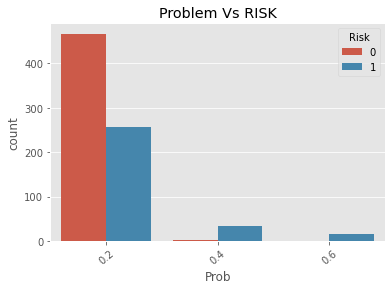

In [39]:
sns.countplot(x='Prob',data=audit[['Prob','Risk']],hue="Risk").set_title("Problem Vs RISK")
plt.xticks(rotation=40)

(array([0, 1, 2]), [Text(0, 0, '0.2'), Text(1, 0, '0.4'), Text(2, 0, '0.6')])

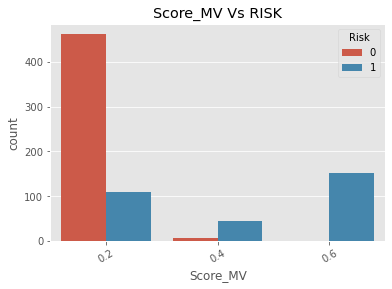

In [40]:
sns.countplot(x='Score_MV',data=audit[['Score_MV','Risk']],hue="Risk").set_title("Score_MV Vs RISK")
plt.xticks(rotation=30)

(array([769.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.   ,  126.891,  253.782,  380.673,  507.564,  634.455,
         761.346,  888.237, 1015.128, 1142.019, 1268.91 ]),
 <BarContainer object of 10 artists>)

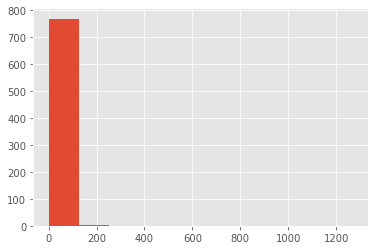

In [41]:
TOTAL = audit["TOTAL"]
plt.hist(TOTAL)

(array([703.,  48.,  14.,   7.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([5. , 5.4, 5.8, 6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 10 artists>)

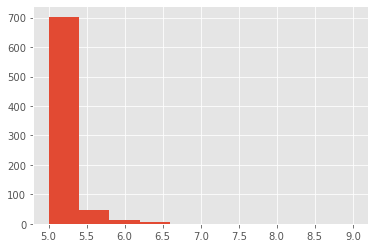

In [42]:
numbers = audit["numbers"]
plt.hist(numbers)

(array([703.,   0.,  48.,   0.,   0.,  14.,   7.,   0.,   0.,   1.]),
 array([1.  , 1.44, 1.88, 2.32, 2.76, 3.2 , 3.64, 4.08, 4.52, 4.96, 5.4 ]),
 <BarContainer object of 10 artists>)

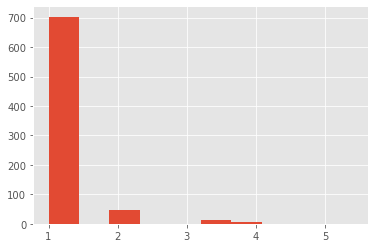

In [43]:
Risk_C = audit["Risk_C"]
plt.hist(Risk_C  )

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

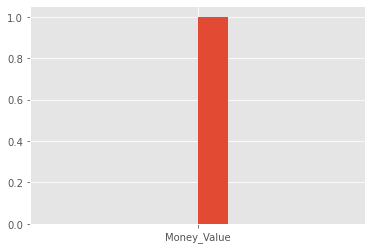

In [44]:
Money_Value = audit['Money_Value']
plt.hist('Money_Value')

(array([723.,  40.,   6.,   0.,   0.,   1.,   1.,   0.,   1.,   1.]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <BarContainer object of 10 artists>)

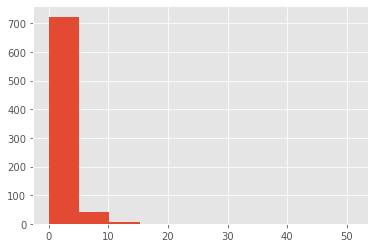

In [45]:
Risk_A = audit["Risk_A"]
plt.hist(Risk_A , bins=10 , rwidth= 1)

(array([769.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.   ,  126.463,  252.926,  379.389,  505.852,  632.315,
         758.778,  885.241, 1011.704, 1138.167, 1264.63 ]),
 <BarContainer object of 10 artists>)

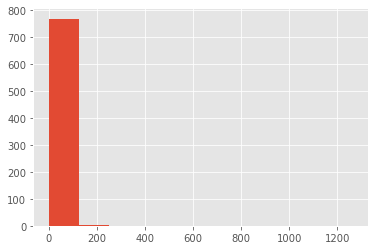

In [46]:
PARA_B = audit ["PARA_B"]
plt.hist(PARA_B)

(array([769.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.    ,  75.8778, 151.7556, 227.6334, 303.5112, 379.389 ,
        455.2668, 531.1446, 607.0224, 682.9002, 758.778 ]),
 <BarContainer object of 10 artists>)

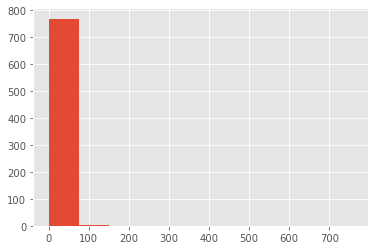

In [47]:
Risk_B = audit["Risk_B"]
plt.hist(Risk_B)

# Correlation check

<AxesSubplot:>

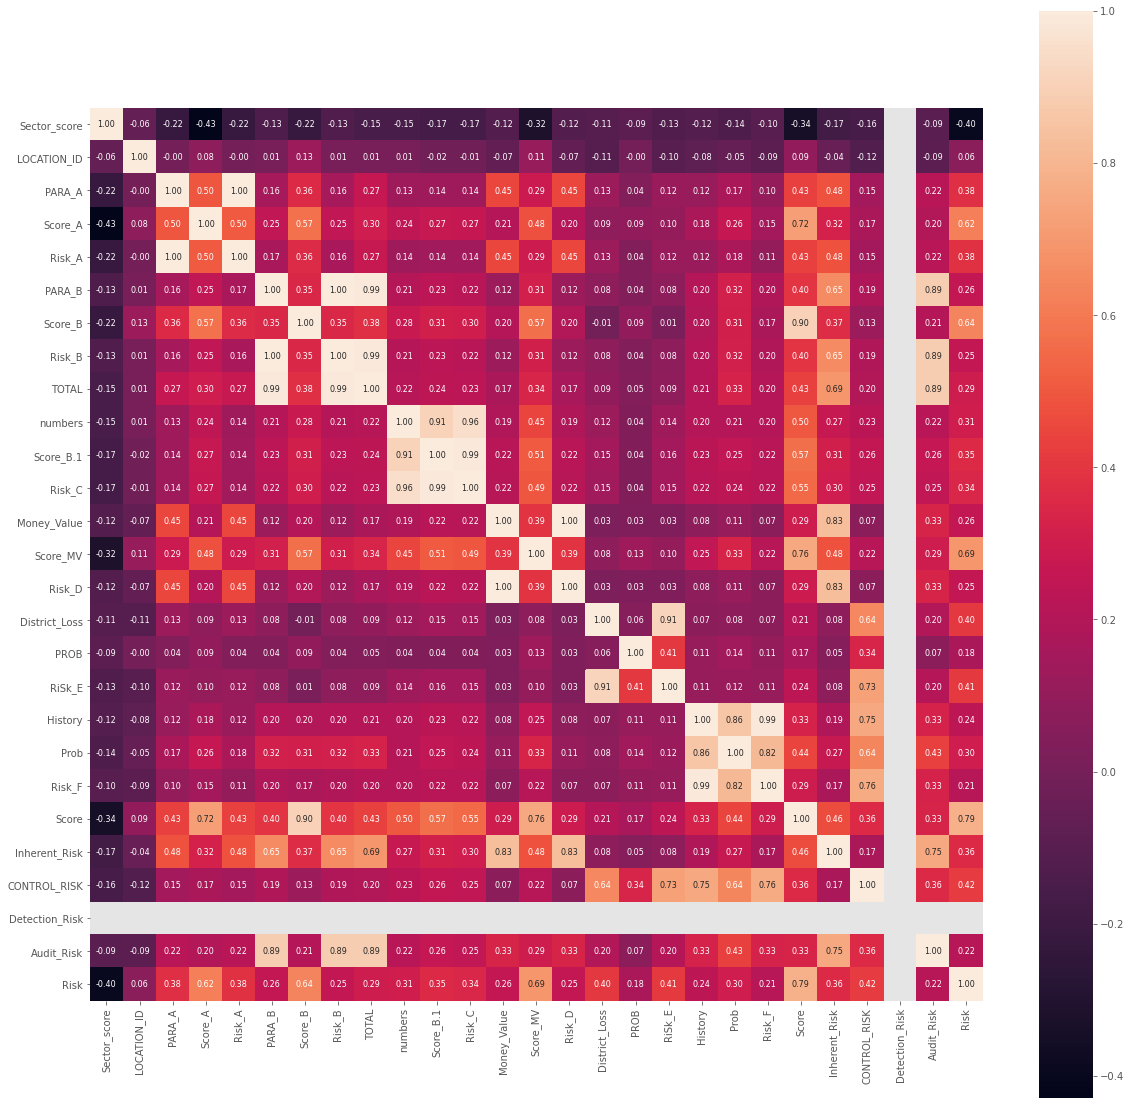

In [48]:
correlation = audit.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

In [49]:
audit['Detection_Risk'].value_counts()

0.5    773
Name: Detection_Risk, dtype: int64

In [50]:
audit = audit.drop(['Detection_Risk'], axis = 1)

In [51]:
audit = audit.drop(['LOCATION_ID','RiSk_E','Risk_F','Score','Inherent_Risk','CONTROL_RISK','Audit_Risk'], axis = 1)

<AxesSubplot:>

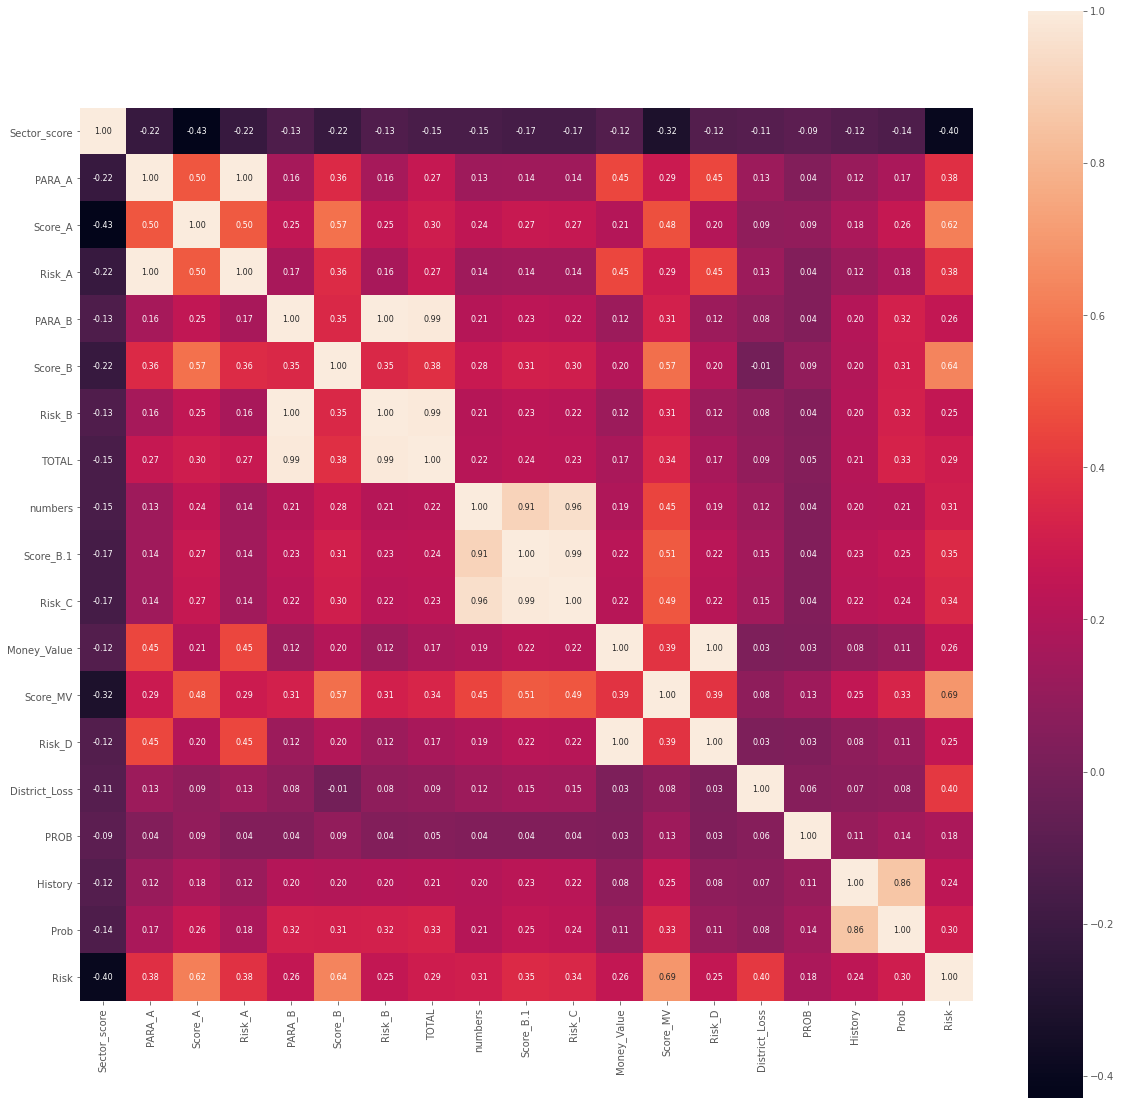

In [52]:
correlation = audit.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

In [53]:
audit = audit.drop(['District_Loss','PROB','Score_B','Score_A','Score_MV'], axis = 1)

In [54]:
audit.head()

,Sector_score,PARA_A,Risk_A,PARA_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Risk_D,History,Prob,Risk
0,3.89,4.18,2.508,2.50,0.500,6.68,5.0,0.2,1.0,3.38,0.676,0,0.2,1
1,3.89,0.00,0.000,4.83,0.966,4.83,5.0,0.2,1.0,0.94,0.188,0,0.2,0
2,3.89,0.51,0.102,0.23,0.046,0.74,5.0,0.2,1.0,0.00,0.000,0,0.2,0
3,3.89,0.00,0.000,10.80,6.480,10.80,6.0,0.6,3.6,11.75,7.050,0,0.2,1
4,3.89,0.00,0.000,0.08,0.016,0.08,5.0,0.2,1.0,0.00,0.000,0,0.2,0


# Data Transformation
#Split Data into train and test data

In [55]:
x = audit.drop(["Risk"], axis = 1)
y=  audit["Risk"]

In [56]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [58]:
#feature Scalling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

In [59]:
print("Size of training set: {}      size of test set: {}\n".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 579      size of test set: 194



# Data Modeling
## Linear Regression


In [67]:
#for LINEAR Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print('Train score: %.4f'%linreg.score(X_train,y_train))


Train score: 0.4569


In [63]:
print('Test score: %.4f'%linreg.score(X_test,y_test))

Test score: -0.8360


In [128]:
 y_pred_lin = linreg.predict(X_train)
 print('predicted response:', y_pred_lin, sep='\n')
 print("Average predict response: {:.2f}".format(y_pred_lin.mean()))

predicted response:
[ 1.04763559e+00  3.16393825e-01  1.57213806e-01  7.45192942e-01
  9.31724369e-01  4.11400506e-01  6.71946586e-02  1.53908198e+00
  3.89133108e-01  5.72416659e-01  1.15051733e-01  6.18310457e-01
  4.54853935e-01  4.03925676e-01  6.35191488e-01  6.71846246e-02
  2.67068962e-01  2.70044396e-01  5.22197144e-01  3.44990284e-01
  3.42838893e-01  9.42011808e-01  3.16791213e-01  4.19422442e-01
  3.19220871e-01  4.01012935e-01  2.36855165e-01  3.18581627e-01
  3.47032687e-02  2.50789200e-01  3.11221327e-01  2.07570026e-01
  1.12106512e-01  1.41124943e+00  7.33358823e-01  3.04497012e-01
  9.54130967e-01  3.40495245e-01  3.22901424e-01  9.65529176e-02
  3.70084963e-01  2.52224814e-02  1.49142066e-02  7.30851013e-02
  2.36675908e-01  3.97213762e-01  4.28938097e-02  8.99973418e-01
  7.82790125e-01  2.78753703e-01  2.72978442e-01  4.42591530e-01
  7.08461283e-01  3.58070231e-01  3.43575273e-01  4.14211990e-02
  2.37098147e-01  3.45726964e-01  8.32966546e-01  8.34019285e-01
  3.4

In [129]:
from sklearn.metrics import mean_squared_error
lin_train_mse = mean_squared_error( y_train,y_pred_lin )
print('Train mse :',lin_train_mse)


Train mse : 0.13041439248605297


In [116]:
Lin_train_rmse = np.sqrt(lin_train_mse)
print( 'Train Rmse :' ,Lin_train_rmse)

Train Rmse : 0.36112932930745595


In [130]:
 y_pred_test_lin = linreg.predict(X_test)
 print('test predicted response:', y_pred_test_lin, sep='\n')
 print("Average test predict response: {:.2f}".format(y_pred_test_lin.mean()))
 

test predicted response:
[ 2.71968263e-01  3.45637541e-01  7.20901274e-01  4.00643772e-01
  2.46587175e-01  4.58456353e-01  1.02406465e+00  1.00325626e-01
  8.53678828e-01  6.57631305e-01  3.48181992e-01  4.03183841e-01
  2.29963863e-01  1.26556025e-01  2.29518051e-01  3.28294319e-01
  3.06841262e-02  3.13332114e-03  1.08398882e-01  2.68849737e-01
  1.04514257e+00  1.16100924e-01  3.96644046e-01  7.41643618e-01
  6.95821734e-01  1.01798237e-01  3.43477531e-01  3.55357358e-01
  2.71038105e-01  2.32381042e-01  9.69406312e-01  2.89319957e-01
  9.40776585e-02  1.19357764e+00  4.06358171e-01  2.91283544e-01
  3.94005615e-01  3.46356177e-01  2.19132042e-01  6.12799605e-01
  5.19459943e-01  3.43477531e-01  4.31062120e-01  7.54164295e-02
  1.00203843e+00  9.51751609e-02  7.97090769e-02  3.08949926e-01
  3.07074565e-01  3.47237804e-01  1.15051733e-01  9.48508179e-02
  2.87316555e-01  3.80331499e-01  4.24134066e-01  6.02615334e-01
  3.06717309e-01  7.43404244e-01  2.63480130e-01  5.52691377e-01


In [112]:
lin_test_mse = mean_squared_error( y_test,y_pred_test )
print('Test mse : ',lin_test_mse)

Test mse :  0.43090157370180343


In [114]:
Lin_test_rmse = np.sqrt(lin_test_mse)
print('Test Rmse : ' ,Lin_test_rmse)

Test Rmse :  0.6564309359725541


# # Decission treee


In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Create Decision Tree classifer object
dec = DecisionTreeClassifier()

In [121]:
# Train Decision Tree Classifer
dec = dec.fit(X_train,y_train)

In [126]:
#Predict the response for test dataset
y_pred_test_dec = dec.predict(X_test)

In [127]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test_dec))

Accuracy: 0.8711340206185567
